In [104]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [124]:
df = pd.read_csv("Messi_News.csv")

In [126]:
df.head()

,url,date,title,summary,text
0,https://www.goal.com/en/news/a-waste-of-ronald...,"Aug 28, 2021",A waste of Ronaldo's time and Juventus' money:...,The Portuguese superstar was signed to fire th...,Merely mentioning Cristiano Ronaldo's name is ...
1,https://www.goal.com/en/news/messi-poised-for-...,"Aug 21, 2021","Messi poised for PSG debut against Reims, says...",The former Barcelona forward will be looking t...,Lionel Messi could be in line for his Paris Sa...
2,https://www.goal.com/en/news/video-mbappe-assi...,"Aug 17, 2021",Video: Mbappe assists Messi goal in PSG traini...,The six-time Ballon d'Or winner seems to have ...,Paris Saint-Germain have released a clip of Ky...
3,https://www.goal.com/en/news/barcelona-less-fe...,"Aug 22, 2021","Barcelona less feared without Messi, admits Ko...",The exit of the prolific forward after a glitt...,Barcelona are less feared without Lionel Messi...
4,https://www.goal.com/en/news/barcelona-real-ma...,"Mar 25, 2021",Barcelona & Real Madrid told ‘magic trick’ is ...,"The president of La Liga cannot see how, amid ...",Barcelona and Real Madrid have been warned tha...


In [128]:
df['date_M_Y'] = [(datetime.datetime.strptime(item, '%b %d, %Y').strftime('%m/%Y')) for item in df['date']]
# df['date_M_Y']

pre_trend_dict = {}
for item in df['date_M_Y']:
    pre_trend_dict[item] = pre_trend_dict.get(item,0)+1

trend_dict={'Month':[item for item in pre_trend_dict.keys()], 'num': [item for item in pre_trend_dict.values()]}

trend_df = pd.DataFrame(trend_dict)
trend_df.head()

,Month,num
0,08/2021,74
1,03/2021,46
2,02/2021,50
3,07/2021,45
4,01/2021,54


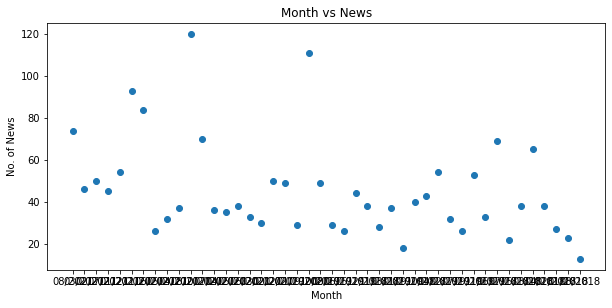

In [171]:
X=trend_df['Month']
Y=trend_df['num']

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.scatter(X,Y)
plt.xlabel('Month')
plt.ylabel('No. of News')
# plt.xticks(['2018','2019','2020','2021'])

plt.title('Month vs News')


plt.show()

In [158]:
Trend_Months = trend_df.sort_values(['num'], ascending=False, inplace= False)
Trend_Months.head()

,Month,num
10,08/2020,120
20,09/2020,111
5,12/2020,93
6,11/2020,84
0,08/2021,74


In [169]:
#More news than mean of last three years
trend_upper_mean = trend_df[trend_df.num > trend_df.num.mean()][['Month','num']]
trend_upper_mean.sort_values(['num'], ascending=False, inplace= False)


,Month,num
10,08/2020,120
20,09/2020,111
5,12/2020,93
6,11/2020,84
0,08/2021,74
11,10/2020,70
36,06/2018,69
39,03/2018,65
4,01/2021,54
31,04/2019,54


In [174]:
X=trend_df['Month']
Y=trend_df['num']


trend_df.corr()

,num
num,1.0
